In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams["figure.figsize"] = (20,8)

In [30]:
data = pd.read_csv("/content/Analytics Form (Responses) - Form Responses 1.csv")
data.head()

,Timestamp,Distance
0,9/20/2022 16:18:10,13
1,9/20/2022 16:18:18,24
2,9/20/2022 16:18:27,113
3,9/20/2022 16:28:59,451
4,9/20/2022 16:56:08,"(114.49, 1.98, 0.00)"


In [ ]:
data['Distance']

In [31]:
def filter(distances):
  '''
  Arguments: @distances
  @distances = list of distances
  Each element of the list currently has inconsistencies due to changes in the distance format
  This function considers only the distance and not the player health, enemy health or status
  '''
  filtered_distances = []
  for distance in distances:
    distance = str(distance)
    distance = distance.split(" ")
    distance = distance[0]
    try:
      filtered_distances.append(float(distance))
    except:
      pass
  return filtered_distances 

In [32]:
distances = list(data['Distance'])
distances = filter(distances)
print(distances)

[13.0, 24.0, 113.0, 451.0, 104.3501, 99.83925, 0.0, 104.4479, 104.45, 110.09, 100.03, 74.29, 130.35, 119.67, 120.81, 120.81, 100.22, 0.0, 99.88, 99.88, 120.51, 199.7, 199.15, 199.1479, 218.5746, 218.5746, 219.48, 172.99, 162.99, 4.0, 198.55, 24.15, 198.55, 198.62, 198.62, 199.38, 84.06, 84.06, 238.85, 431.92, 218.98, 399.33]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


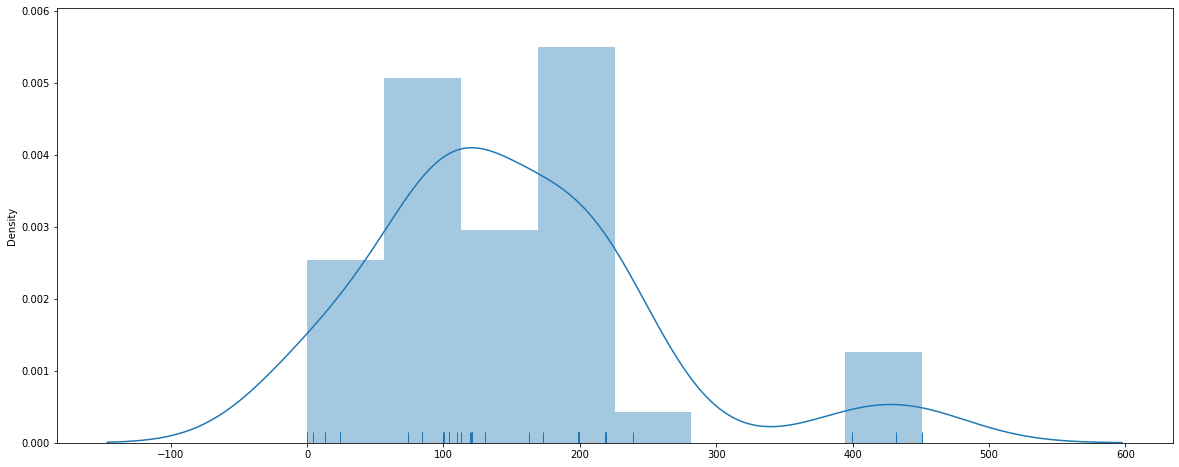

In [33]:
ax = sns.distplot(distances,hist=True,rug=True)
plt.show()

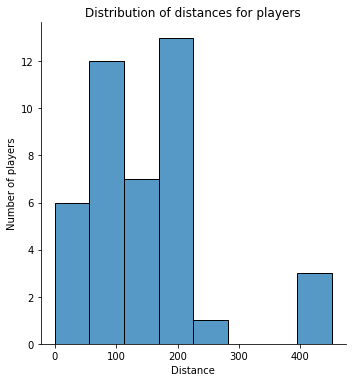

In [38]:
ax = sns.displot(distances)
ax.set(xlabel = "Distance",ylabel = "Number of players",title="Distribution of distances for players")
plt.savefig("Distribution of distances.png")
plt.show()

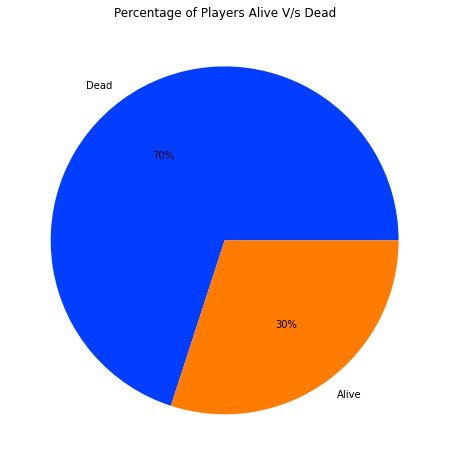

In [37]:
import random 
from collections import Counter
# Generating random data for player status
# Currently we don't have enough data
player_status = []
for _ in range(10):
  player_status.append(random.choice([0,1]))
player_status_counts = Counter(player_status)
player_counts = [player_status_counts[0],player_status_counts[1]]
player_status = ["Dead","Alive"]
palette_color = sns.color_palette('bright')
plt.pie(player_counts, labels=player_status, colors=palette_color, autopct='%.0f%%')
plt.title("Percentage of Players Alive V/s Dead")
plt.savefig("Distribution of dead vs alive players.png")
plt.show()